# Carbon fixation scan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import modelbase
from tqdm.notebook import tqdm
from modelbase.ode import Simulator

plt.style.use("./notebook.mplstyle")
print(modelbase.__version__)

1.3.5


In [2]:
%%capture
cd ..

In [3]:
from models import get_model

In [4]:
%%capture

cd analyses/

In [5]:
def get_new_y0(s):
    return dict(s.get_results_df().iloc[-1])


def pfd_ss_scan(s, pfd_values, y0_loop):
    fluxes = {}
    concentrations = {}
    for x in tqdm(pfd_values, total=len(pfd_values)):
        s.initialise(y0_loop)
        s.update_parameter("pfd", x)
        try:
            t, y = s.simulate_to_steady_state()
            #concentrations[x] = y[-1]
            concentrations[x] = s.get_full_results_array()[-1]
            fluxes[x] = s.model.get_fluxes_array(y=y, t=t)[-1]
            # Model is sensitive to initial conditions, so set the last ones every loop
            y0_loop = get_new_y0(s)
        except:
            all_compounds = s.model.get_all_compounds()
            rate_names = s.model.get_rate_names()
            concentrations[x] = np.full(len(all_compounds), np.nan)
            fluxes[x] = np.full(len(rate_names), np.nan)
    return (
        pd.DataFrame(concentrations, index=s.model.get_all_compounds()).T,
        #pd.DataFrame(concentrations, index=s.model.compounds).T,
        pd.DataFrame(fluxes, index=s.model.get_rate_names()).T
    )


NUM_SCANS = 50
LOW_LIGHT = 50
HIGH_LIGHT = 1500
PFD_VALUES = np.linspace(LOW_LIGHT, HIGH_LIGHT, NUM_SCANS)

y0 = {
    "PQ": 11.248282037382348,
    "PC": 1.3639930534269078,
    "Fd": 4.207984023619571,
    "ATP": 1.6085042256522668,
    "NADPH": 0.45672250689837696,
    "H": 0.002174958602661375,
    "LHC": 0.8079188314632375,
    "Psbs": 0.9626375680773129,
    "Vx": 0.9570474456930378,
    "PGA": 0.6109221284988471,
    "BPGA": 0.0003235574325883373,
    "GAP": 0.003190323205250446,
    "DHAP": 0.07018710225866034,
    "FBP": 0.0015898274733035427,
    "F6P": 0.0886998278393475,
    "G6P": 0.20400960399249862,
    "G1P": 0.011832557030606641,
    "SBP": 0.003215008299488195,
    "S7P": 0.02811069161049136,
    "E4P": 0.003523560381569699,
    "X5P": 0.006746131132013272,
    "R5P": 0.011299769265221232,
    "RUBP": 0.030373422172205858,
    "RU5P": 0.004519907641254276,
    "MDA": 2.2718326276618075e-06,
#    "ASC": 9.999997726884683,
    "H2O2": 1.3296482521160688e-06,
    "DHA": 1.2828228406972059e-09,
#    "GSH": 9.999999998752703,
    "GSSG": 6.236645512101874e-10,
    "TR_ox": 0.9,
    "E_inactive": 4.7368421052631575,
}

In [6]:
s = Simulator(get_model())
c_ss_petc, v_ss_petc = pfd_ss_scan(s, PFD_VALUES, y0)

  0%|          | 0/50 [00:00<?, ?it/s]

KeyError: 'ASC'

<AxesSubplot:title={'center':'electron carriers'}>

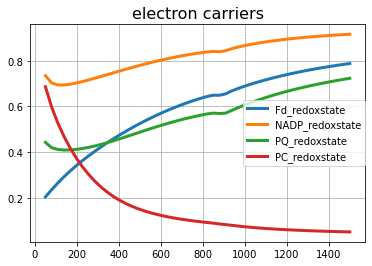

In [7]:
c_ss_petc.loc[:, ["Fd_redoxstate","NADP_redoxstate","PQ_redoxstate","PC_redoxstate"]].plot(title="electron carriers")

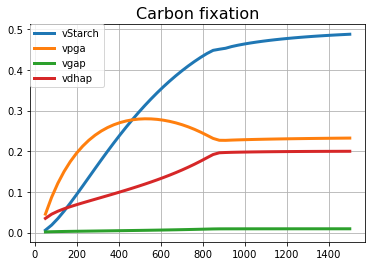

In [8]:
v_ss_petc.loc[:, ["vStarch", "vpga", "vgap", "vdhap"]].plot(title="Carbon fixation")
plt.show()

<AxesSubplot:title={'center':'pH'}>

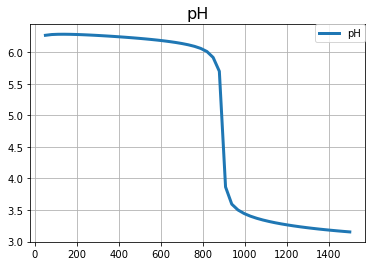

In [9]:
c_ss_petc.loc[:, ["pH"]].plot(title="pH")

In [19]:
cexport=v_ss_petc.loc[:, ["vStarch", "vpga", "vgap", "vdhap"]]*np.array([6,3,3,3])

<AxesSubplot:title={'center':'total carbon export (C-mol)'}>

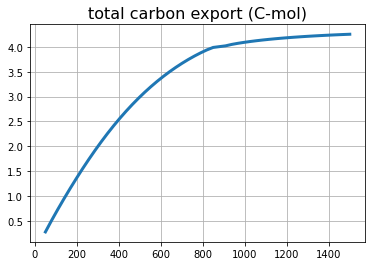

In [25]:
cexport.sum(1).plot(title="total carbon export (C-mol)")

<AxesSubplot:title={'center':'normalised ATP'}>

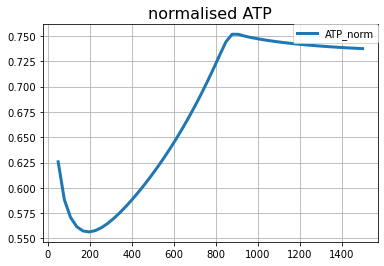

In [27]:
c_ss_petc.loc[:,["ATP_norm"]].plot(title="normalised ATP")

<AxesSubplot:title={'center':'CBB activity'}>

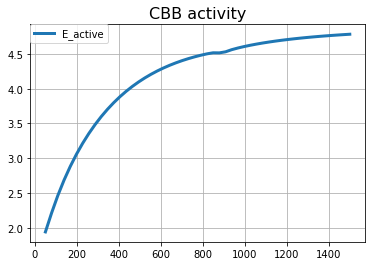

In [30]:
c_ss_petc.loc[:,["E_active"]].plot(title="CBB activity")

<AxesSubplot:title={'center':'electron flow'}>

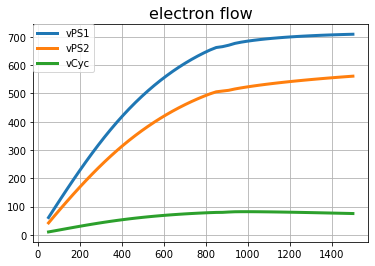

In [40]:
(v_ss_petc.loc[:,["vPS1","vPS2","vCyc"]]*np.array([1,2,1])).plot(title="electron flow")

Just to check that electron flow is at steady state, i.e. vPS1 = 2*vPS2 + 2*vCyc

<AxesSubplot:title={'center':'electron flow'}>

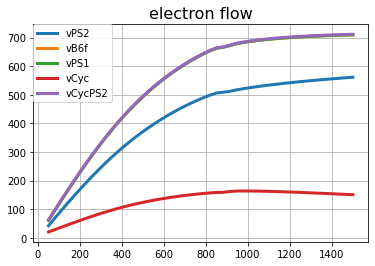

In [60]:
erates = v_ss_petc.loc[:,["vPS2","vB6f","vPS1","vCyc"]]*np.array([2,2,1,2])
erates["vCycPS2"]=(v_ss_petc.loc[:,["vPS2","vCyc"]]*np.array([2,2])).sum(1)
erates.plot(title="electron flow")

<AxesSubplot:title={'center':'Mehler'}>

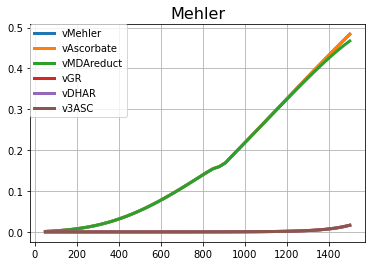

In [63]:
v_ss_petc.loc[:,["vMehler","vAscorbate","vMDAreduct","vGR","vDHAR","v3ASC"]].plot(title="Mehler rates")

<AxesSubplot:title={'center':'Mehler compounds'}>

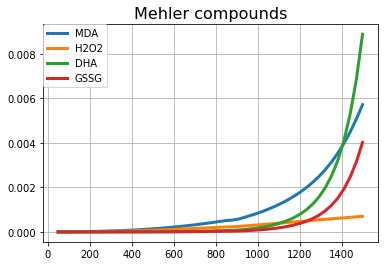

In [68]:
c_ss_petc.loc[:,["MDA",
            "H2O2",
            "DHA",
            "GSSG"]].plot(title="Mehler compounds")

In [64]:
s.model.get_all_compounds()

['PQ',
 'PC',
 'Fd',
 'ATP',
 'NADPH',
 'H',
 'LHC',
 'Psbs',
 'Vx',
 'PGA',
 'BPGA',
 'GAP',
 'DHAP',
 'FBP',
 'F6P',
 'G6P',
 'G1P',
 'SBP',
 'S7P',
 'E4P',
 'X5P',
 'R5P',
 'RUBP',
 'RU5P',
 'MDA',
 'ASC',
 'H2O2',
 'DHA',
 'GSH',
 'GSSG',
 'TR_ox',
 'E_inactive',
 'PQred',
 'PCred',
 'Fdred',
 'ADP',
 'NADP',
 'LHCp',
 'Zx',
 'Psbsp',
 'ps2cs',
 'Q',
 'B0',
 'B1',
 'B2',
 'B3',
 'A0',
 'A1',
 'A2',
 'Fluo',
 'pH',
 'Pi',
 'N',
 'TR_red',
 'E_active',
 'V1',
 'V6',
 'V9',
 'V13',
 'Vst',
 'PQ_redoxstate',
 'Fd_redoxstate',
 'PC_redoxstate',
 'NADP_redoxstate',
 'ATP_norm']

In [31]:
s.model.get_rate_names()

['vPS2',
 'vPS1',
 'vPTOX',
 'vNDH',
 'vB6f',
 'vCyc',
 'vFNR',
 'vLeak',
 'vSt12',
 'vSt21',
 'vATPsynthase',
 'vDeepox',
 'vEpox',
 'vLhcprotonation',
 'vLhcdeprotonation',
 'vRuBisCO',
 'vPGA_kinase',
 'vBPGA_dehydrogenase',
 'vTPI',
 'vAldolase',
 'vFBPase',
 'vF6P_Transketolase',
 'v8',
 'v9',
 'v10',
 'v11',
 'v12',
 'v13',
 'vG6P_isomerase',
 'vPhosphoglucomutase',
 'vpga',
 'vgap',
 'vdhap',
 'vStarch',
 'vFdred',
 'vAscorbate',
 'vMDAreduct',
 'vMehler',
 'vGR',
 'vDHAR',
 'v3ASC',
 'vEX_ATP',
 'vEX_NADPH',
 'vFdTrReductase',
 'vE_activation',
 'vE_inactivation']

In [66]:
pd.DataFrame({'42':s.get_full_results_array()[-1]},index=m.get_all_compounds())

,42
PQ,9.755488
PC,1.255367
Fd,3.980412
ATP,1.595539
NADPH,0.587480
...,...
Vst,0.621318
PQ_redoxstate,0.442544
Fd_redoxstate,0.203918
PC_redoxstate,0.686158


In [11]:
c_ss_petc.loc[:, ["PQ_redoxstate"]].plot(title="electron carriers")

KeyError: "None of [Index(['PQ_redoxstate'], dtype='object')] are in the [columns]"